In [1]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from warnings import filterwarnings
filterwarnings ("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
pd.set_option('display.max.columns',50)

In [3]:
df=pd.read_excel('Shopping_trends.xlsx')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.shape

(3900, 19)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
# identifying columns which has one or more than 1 missing values

df.columns[df.isnull().any()]

Index([], dtype='object')

In [7]:
# data cleaning

In [8]:
# identifying missing values

df.isnull().sum()/df.shape[0]*100

# there is no missing values

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64

In [9]:
# identifying duplicate values

df.duplicated().sum()

0

In [10]:
# capitalizing each columns name

df.columns=[x.capitalize() for x in df.columns]

In [11]:
df.columns

Index(['Customer id', 'Age', 'Gender', 'Item purchased', 'Category',
       'Purchase amount (usd)', 'Location', 'Size', 'Color', 'Season',
       'Review rating', 'Subscription status', 'Payment method',
       'Shipping type', 'Discount applied', 'Promo code used',
       'Previous purchases', 'Preferred payment method',
       'Frequency of purchases'],
      dtype='object')

In [12]:
# print unique values form each columns to identify any descrepencies

for x in df.select_dtypes(include='object'):
    print(x)
    print(df[x].unique())
    print('')

Gender
['Male' 'Female']

Item purchased
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Category
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Location
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']

Size
['L' 'S' 'M' 'XL']

Color
['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 

In [13]:
for x in df.select_dtypes(include='number'):
    print(x)
    print(df[x].unique())
    print('')

Customer id
[   1    2    3 ... 3898 3899 3900]

Age
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

Purchase amount (usd)
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]

Review rating
[3.1 3.5 2.7 2.9 3.2 2.6 4.8 4.1 4.9 4.5 4.7 2.8 4.6 3.3 4.4 3.6 5.  4.
 3.7 4.2 3.9 3.  3.8 3.4 4.3 2.5]

Previous purchases
[14  2 23 49 31 19  8  4 26 10 37 34 44 36 17 46 50 22 32 40 16 13  7 41
 45 38 48 18 15 25 39 35 29 21 43  3  5 24 42 47 28 20 33  1  9 12 27 11
 30  6]



In [14]:
# converting catigorical value into upper form

df[df.select_dtypes(include='object').columns]=df.select_dtypes(include='object').applymap(lambda x: x.upper())

In [15]:
df.columns

Index(['Customer id', 'Age', 'Gender', 'Item purchased', 'Category',
       'Purchase amount (usd)', 'Location', 'Size', 'Color', 'Season',
       'Review rating', 'Subscription status', 'Payment method',
       'Shipping type', 'Discount applied', 'Promo code used',
       'Previous purchases', 'Preferred payment method',
       'Frequency of purchases'],
      dtype='object')

In [16]:
# renaming columns

df.rename({'Purchase amount (usd)':'Purchase amount_dollars','Previous purchases':'Previous purchase_dollars'},axis=1,inplace=True)

In [17]:
# descreptive analysis

df.describe(include='number').apply(lambda x: round(x,2)).T

,count,mean,std,min,25%,50%,75%,max
Customer id,3900.0,1950.50,1125.98,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.07,15.21,18.0,31.00,44.0,57.00,70.0
Purchase amount_dollars,3900.0,59.76,23.69,20.0,39.00,60.0,81.00,100.0
Review rating,3900.0,3.75,0.72,2.5,3.10,3.7,4.40,5.0
Previous purchase_dollars,3900.0,25.35,14.45,1.0,13.00,25.0,38.00,50.0


<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Customer id', ylabel='Density'>

Text(0.5, 1.0, 'Skewness in Customer id')

<Axes: >

<Axes: xlabel='Customer id'>

Text(0.5, 1.0, 'Outliers in Customer id')

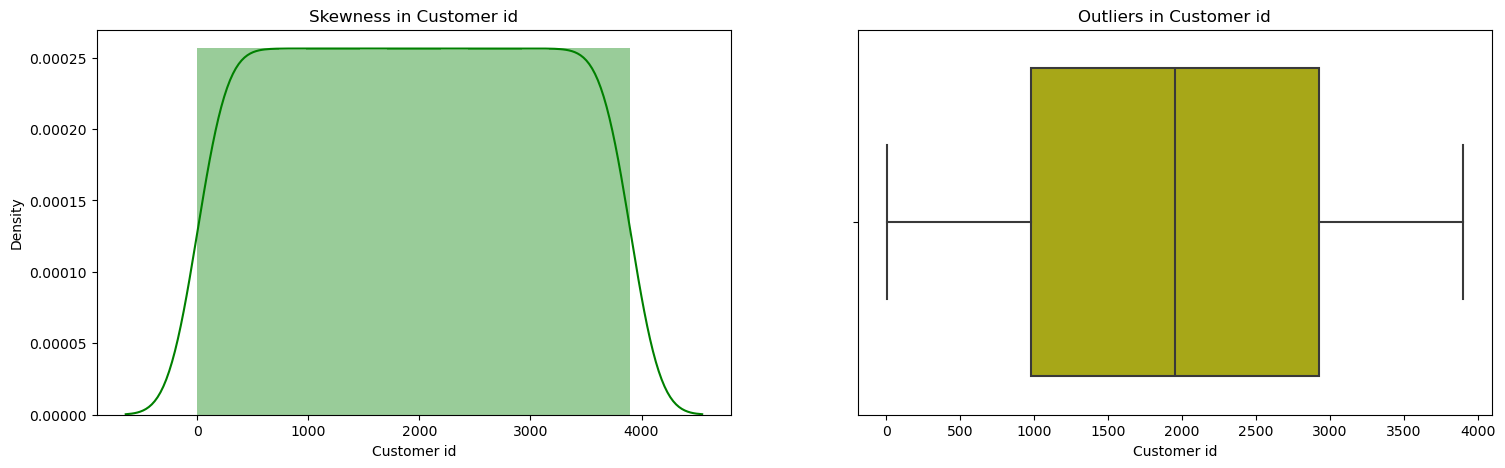

<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Age', ylabel='Density'>

Text(0.5, 1.0, 'Skewness in Age')

<Axes: >

<Axes: xlabel='Age'>

Text(0.5, 1.0, 'Outliers in Age')

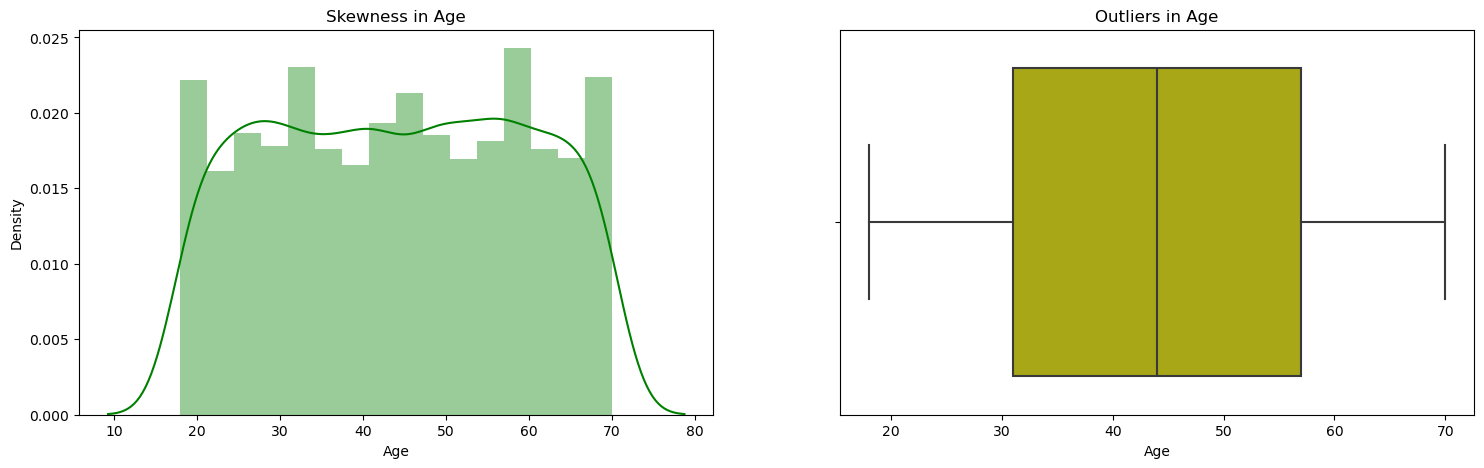

<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Purchase amount_dollars', ylabel='Density'>

Text(0.5, 1.0, 'Skewness in Purchase amount_dollars')

<Axes: >

<Axes: xlabel='Purchase amount_dollars'>

Text(0.5, 1.0, 'Outliers in Purchase amount_dollars')

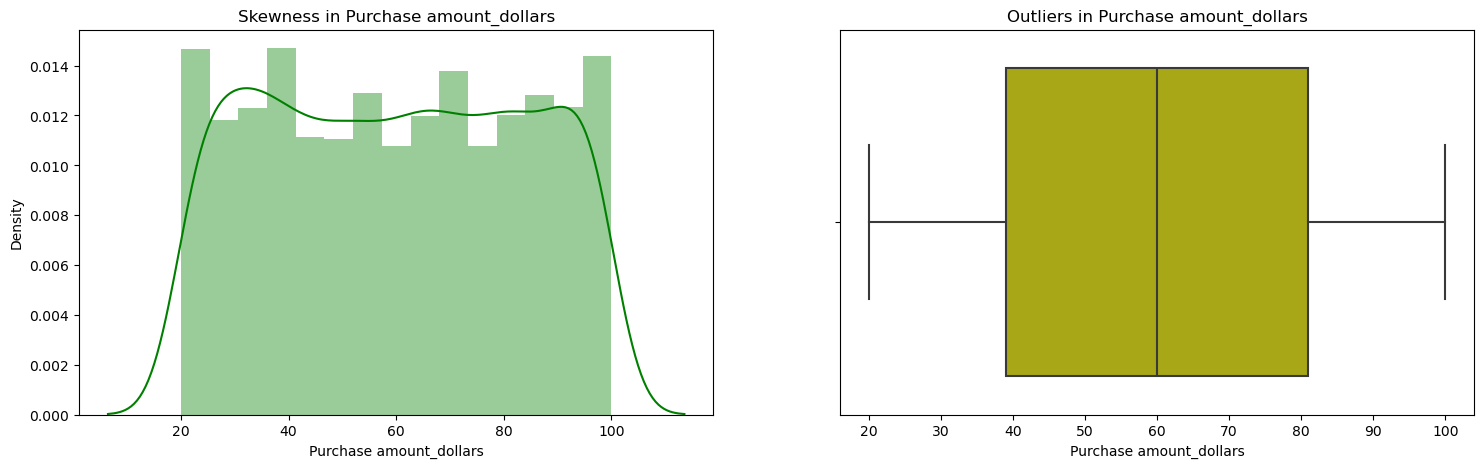

<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Review rating', ylabel='Density'>

Text(0.5, 1.0, 'Skewness in Review rating')

<Axes: >

<Axes: xlabel='Review rating'>

Text(0.5, 1.0, 'Outliers in Review rating')

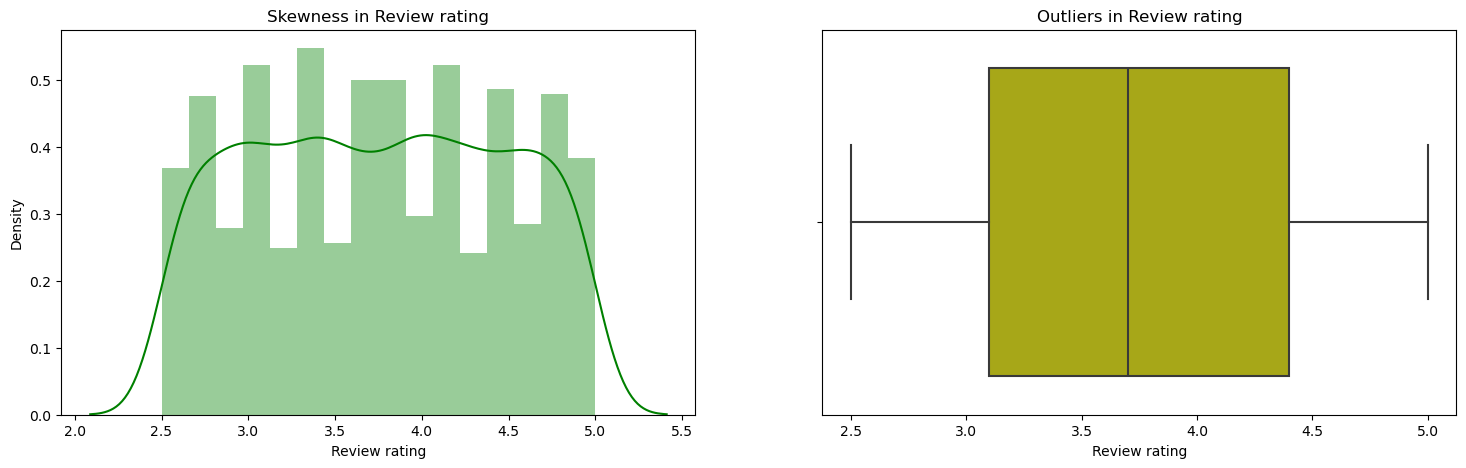

<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Previous purchase_dollars', ylabel='Density'>

Text(0.5, 1.0, 'Skewness in Previous purchase_dollars')

<Axes: >

<Axes: xlabel='Previous purchase_dollars'>

Text(0.5, 1.0, 'Outliers in Previous purchase_dollars')

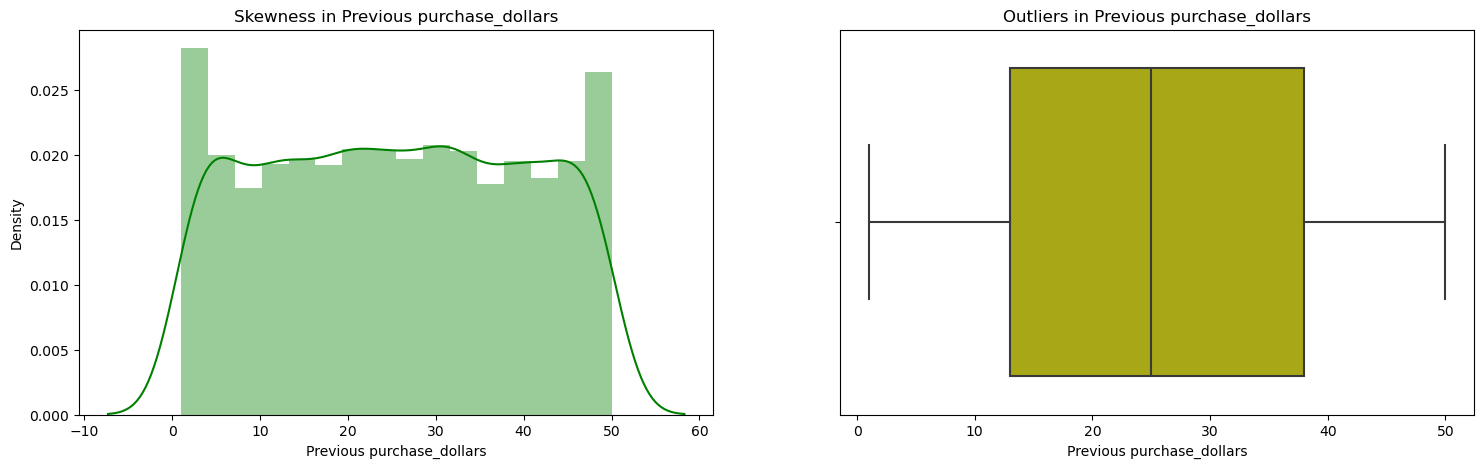

In [18]:
# identifying outliers in the data set

for x in df.select_dtypes(include='number'):
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    sns.distplot(df[x],color='g')
    plt.title(f'Skewness in {x}')
    plt.subplot(1,2,2)
    sns.boxplot(x=x,data=df,color='y')
    plt.title(f'Outliers in {x}')
    plt.show()

# there is no outliers in the data

In [19]:
# creating age bucket column

print('Min age is:', df['Age'].min())
print('Max age is:',np.max(df['Age']))

df['Age bucket']=np.where(df['Age']<=12,'Child',np.where(df['Age']<=19,'Teenager',np.where(df['Age']<=35,'Young adults',np.where(df['Age']<=55,'Middle aged adults','Senior'))))

Min age is: 18
Max age is: 70


In [20]:
df['Demographic segment']=df['Age bucket']+' '+df['Gender']

In [21]:
# now we can start working on our problem statement

In [22]:
# Objective:
# To analyze consumer shopping trends and behaviors through detailed 
# transactional data. The goal is to uncover actionable insights into purchasing patterns,
# customer preferences, and seasonal trends, enabling retailers to:

# objective 1
# Enhance Marketing Strategies: 
# Identify high-value customer segments and tailor promotions to their preferences.

In [23]:
# calculating high value customers
# creating total spent column

df['Total spent']=df['Purchase amount_dollars']+df['Previous purchase_dollars']

In [24]:
# creating high value customer column

df['High value customers']=(df['Total spent']>np.percentile(df['Total spent'],75)) & (df['Review rating']>=4)

In [25]:
df[df['High value customers']==True].shape[0]

# out of 3900 customers, 423 customers are high valued.

423

In [31]:
# analyzing high valued customer segment

# here we are grouping by demographic segment and calculating avg total spent and review rating

high_value=df.loc[df['High value customers']==True]

high_value.groupby('Demographic segment').agg({'Total spent':'mean','Review rating':'mean'}).apply(lambda x: round(x,1)).sort_values(by=['Total spent'],ascending=False)

# senior male and young adults female are our high value customer segment

,Total spent,Review rating
Demographic segment,,
Senior MALE,123.3,4.5
Young adults FEMALE,123.0,4.5
Young adults MALE,122.9,4.5
Teenager MALE,122.5,4.7
Middle aged adults FEMALE,121.5,4.5
Middle aged adults MALE,121.2,4.5
Senior FEMALE,120.9,4.4
Teenager FEMALE,118.2,4.7


In [133]:
# now we will analyze high valued customer preference

items=high_value.groupby('Item purchased').agg({'Total spent':'sum'}).sort_values(by='Total spent',ascending=False).reset_index()

season=high_value.groupby('Season').agg({'Total spent':'sum'}).sort_values(by='Total spent',ascending=False).reset_index()
items
season
# from this analysis we can see that jewelry is the most purchased item among the high valued customers
# and season wise, Fall season experience the highest total sales, which means our high value customers love to do shopping
# in the fall season.

,Item purchased,Total spent
0,JEWELRY,2838
1,DRESS,2536
2,COAT,2530
3,SCARF,2510
4,T-SHIRT,2495
5,HOODIE,2462
6,BELT,2431
7,BLOUSE,2402
8,SHOES,2361
9,PANTS,2242


,Season,Total spent
0,FALL,14217
1,SPRING,12788
2,WINTER,12532
3,SUMMER,12146


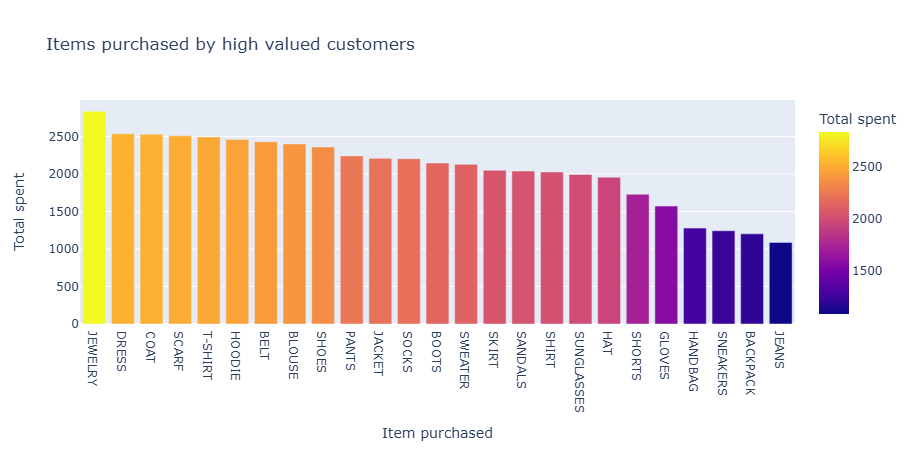

<Figure size 700x400 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Total spent by high values customers season wise')

Text(0, 0.5, 'Total sales')

Text(0.5, 0, 'Season')

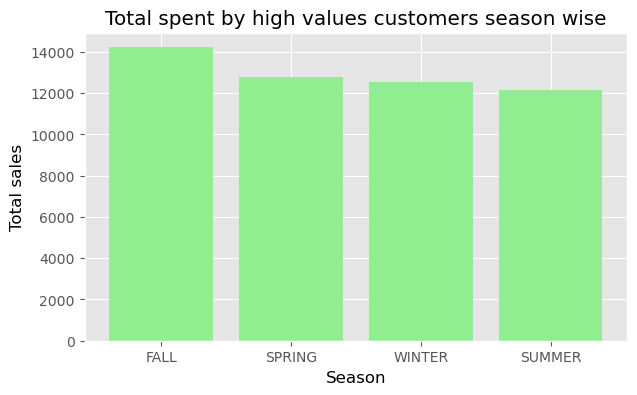

In [152]:
# visualisation

px.bar(items,x='Item purchased',y='Total spent',color='Total spent',height=450,title='Items purchased by high valued customers')

# jewelery is the most purchased item among the high value customers

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
plt.bar(season['Season'],season['Total spent'],color='lightgreen')
plt.title('Total spent by high values customers season wise')
plt.ylabel('Total sales',color='black')
plt.xlabel('Season',color='black')

In [153]:
# geographical insights
# finding location with the heighest total sales among the high valed customers

location=high_value.groupby('Location')['Total spent'].sum().sort_values(ascending=False).idxmax()
location
# our highest total sales comes from marryland 

'MARYLAND'

In [55]:
# preferred payment method among the high valued customers

df.loc[df['High value customers']==True].groupby('Preferred payment method')['Total spent'].sum().sort_values(ascending=False).idxmax()

# and the most preferred paymnet method among the high valued customers is cash.

'CASH'

# Objective 2

# Boost Customer Retention: Understand loyalty patterns and develop personalized engagement strategies.

In [76]:
df['Frequency of purchases'].unique()

array(['EVERY TWO WEEKS', 'WEEKLY', 'ANNUALLY', 'QUARTERLY',
       'TWICE A WEEK', 'MONTHLY', 'EVERY 3 MONTHS'], dtype=object)

In [71]:
df['Frequency of purchases']=df['Frequency of purchases'].apply(lambda x: 'EVERY TWO WEEKS' if x=='FORTNIGHTLY' else ('TWICE A WEEK' if x=='BI-WEEKLY' else x))

In [86]:
# finding loyal customers

df.loc[df['Frequency of purchases'].isin(['EVERY TWO WEEKS','WEEKLY','TWICE A WEEK','MONTHLY']) & (df['Subscription status']=='YES')].shape[0]

# 599 customers are loyal to us (who does shopping EVERY TWO WEEKS','WEEKLY',' TWICE A WEEK', 'MONTHLY, and those who have subs)

599

In [93]:
# creating a loyal customers columns

df['Loyal customers']=(df['Frequency of purchases'].isin(['EVERY TWO WEEKS','WEEKLY','TWICE A WEEK','MONTHLY'])) & (df['Subscription status']=='YES')

In [97]:
df['Loyal customers']=df['Loyal customers'].apply(lambda x: 'YES' if x==True else 'NO')

In [154]:
# analyzing customer segment 

loyal=df.loc[df['Loyal customers']=='YES'].groupby('Demographic segment')['Total spent'].sum().sort_values(ascending=False)
loyal
# we found out that most of our loyal customers are middle aged adults males

Demographic segment
Middle aged adults MALE    20535
Young adults MALE          15102
Senior MALE                14058
Teenager MALE               1467
Name: Total spent, dtype: int64

<Figure size 900x400 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Total spent by customer segment')

Text(0, 0.5, 'Total spent')

Text(0.5, 0, 'Customer demographic')

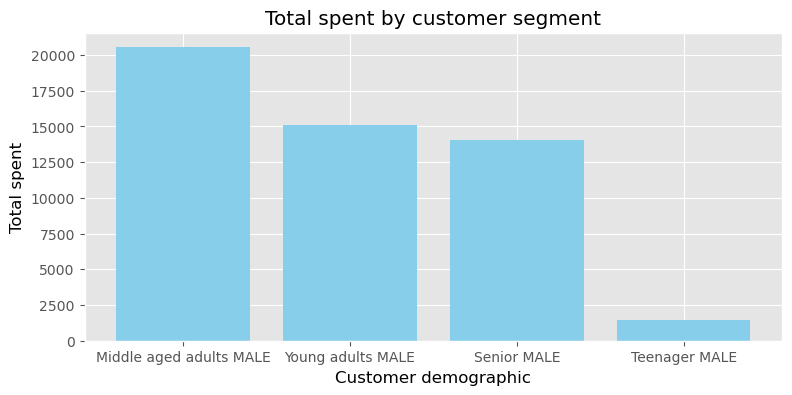

In [158]:
# visualisatin

plt.figure(figsize=(9,4))
plt.bar(loyal.index,loyal,color='skyblue')
plt.title('Total spent by customer segment')
plt.ylabel('Total spent',color='Black')
plt.xlabel('Customer demographic',color='Black')

# we found out that most of our loyal customers are middle aged adults males

In [124]:
# analyzing loyal customers preferences

=df.loc[df['Loyal customers']=='YES'].groupby('Item purchased').agg({'Total spent':'sum'}).sort_values(by='Total spent',ascending=False)

df.loc[df['Loyal customers']=='YES'].groupby('Season').agg({'Total spent':'sum'}).sort_values(by='Total spent',ascending=False)

# we analysed that out loyal customers prefer sneakers and love to shopping in winter season

,Total spent
Item purchased,
SNEAKERS,2794
COAT,2781
SWEATER,2723
BELT,2430
HAT,2402
HOODIE,2386
PANTS,2320
DRESS,2310
JEWELRY,2294


,Total spent
Season,
WINTER,13264
SPRING,12951
SUMMER,12638
FALL,12309


In [126]:
# geagraphical analysis

df.loc[df['Loyal customers']=='YES'].groupby('Location')['Total spent'].sum().sort_values(ascending=False)

# heighest sales is from nevada
# most of our loyal customers belongs to nevada region

Location
NEVADA            1792
DELAWARE          1466
MASSACHUSETTS     1451
MONTANA           1396
KENTUCKY          1344
NEW YORK          1302
OHIO              1296
INDIANA           1257
ILLINOIS          1248
NEBRASKA          1247
LOUISIANA         1237
CALIFORNIA        1232
NEW MEXICO        1210
ALABAMA           1209
IOWA              1181
MISSOURI          1179
WEST VIRGINIA     1158
IDAHO             1117
RHODE ISLAND      1112
CONNECTICUT       1110
HAWAII            1108
OKLAHOMA          1106
NORTH CAROLINA    1089
ARIZONA           1081
SOUTH CAROLINA    1045
VIRGINIA          1043
GEORGIA           1035
ARKANSAS          1006
MARYLAND           978
COLORADO           973
MICHIGAN           963
SOUTH DAKOTA       943
PENNSYLVANIA       907
MINNESOTA          898
OREGON             857
ALASKA             845
VERMONT            828
MAINE              823
UTAH               820
NORTH DAKOTA       768
WASHINGTON         754
WYOMING            751
TENNESSEE          741
TE

# objective 3

# Optimize Inventory Management: Forecast demand trends across product categories and seasons.

In [160]:
df.groupby(['Season','Category'])['Total spent'].sum().idxmax()

# we can see that clothing category has the heighest demand in the winter season
# so we have to manage our inventory according to that

('WINTER', 'CLOTHING')

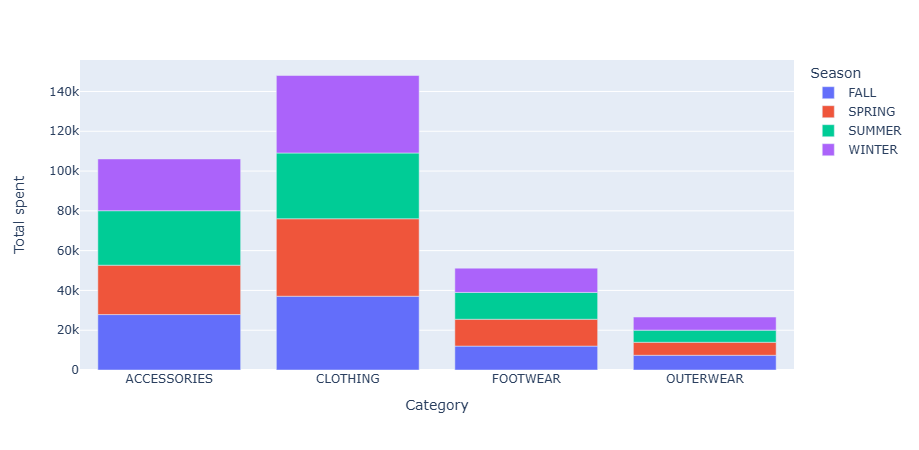

In [164]:
category=df.groupby(['Season','Category'])['Total spent'].sum().reset_index()
# category

px.bar(category,x='Category',y='Total spent',color='Season',height=450)

# objective 4

# Improve Channel Performance: Analyze purchase behavior across
# different channels to prioritize investments in high-performing platforms.

In [ ]:
# we dont any detials regarding different channels or shopping platform.
# so we cant analyze this question properly

In [99]:
df.head()

,Customer id,Age,Gender,Item purchased,Category,Purchase amount_dollars,Location,Size,Color,Season,Review rating,Subscription status,Payment method,Shipping type,Discount applied,Promo code used,Previous purchase_dollars,Preferred payment method,Frequency of purchases,Age bucket,Demographic segment,Total spent,High value customers,Loyal customers
0,1,55,MALE,BLOUSE,CLOTHING,53,KENTUCKY,L,GRAY,WINTER,3.1,YES,CREDIT CARD,EXPRESS,YES,YES,14,VENMO,EVERY TWO WEEKS,Middle aged adults,Middle aged adults MALE,67,False,YES
1,2,19,MALE,SWEATER,CLOTHING,64,MAINE,L,MAROON,WINTER,3.1,YES,BANK TRANSFER,EXPRESS,YES,YES,2,CASH,EVERY TWO WEEKS,Teenager,Teenager MALE,66,False,YES
2,3,50,MALE,JEANS,CLOTHING,73,MASSACHUSETTS,S,MAROON,SPRING,3.1,YES,CASH,FREE SHIPPING,YES,YES,23,CREDIT CARD,WEEKLY,Middle aged adults,Middle aged adults MALE,96,False,YES
3,4,21,MALE,SANDALS,FOOTWEAR,90,RHODE ISLAND,M,MAROON,SPRING,3.5,YES,PAYPAL,NEXT DAY AIR,YES,YES,49,PAYPAL,WEEKLY,Young adults,Young adults MALE,139,False,YES
4,5,45,MALE,BLOUSE,CLOTHING,49,OREGON,M,TURQUOISE,SPRING,2.7,YES,CASH,FREE SHIPPING,YES,YES,31,PAYPAL,ANNUALLY,Middle aged adults,Middle aged adults MALE,80,False,NO


In [131]:
df.columns

Index(['Customer id', 'Age', 'Gender', 'Item purchased', 'Category',
       'Purchase amount_dollars', 'Location', 'Size', 'Color', 'Season',
       'Review rating', 'Subscription status', 'Payment method',
       'Shipping type', 'Discount applied', 'Promo code used',
       'Previous purchase_dollars', 'Preferred payment method',
       'Frequency of purchases', 'Age bucket', 'Demographic segment',
       'Total spent', 'High value customers', 'Loyal customers'],
      dtype='object')